# Zomato Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Zomato data .csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
pd.isnull(data).sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
#removing /5 by rate column so that data will easily understable

def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

data['rate']= data['rate'].apply(handlerate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# What type of restaurent do the majority of customers order from

Text(0, 0.5, 'Count')

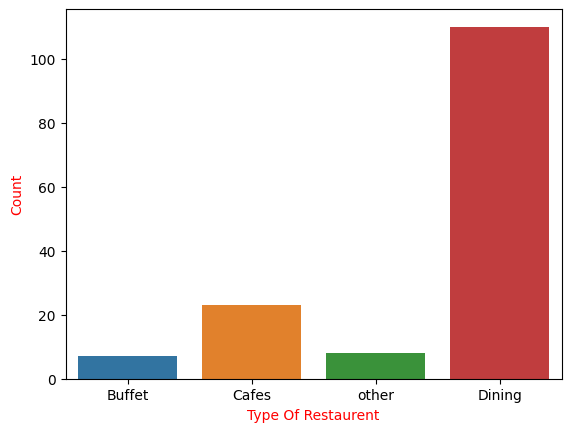

In [43]:

sns.countplot(x = data['listed_in(type)'],hue='listed_in(type)',data=data)
plt.xlabel("Type Of Restaurent",c='red')
plt.ylabel("Count",c='red')

Conclusion: Majority of the public taking Dinning type of Restaurent.

# How many votes has each type of restaurent received from customers

In [9]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'Votes':grouped_data})
result

,Votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

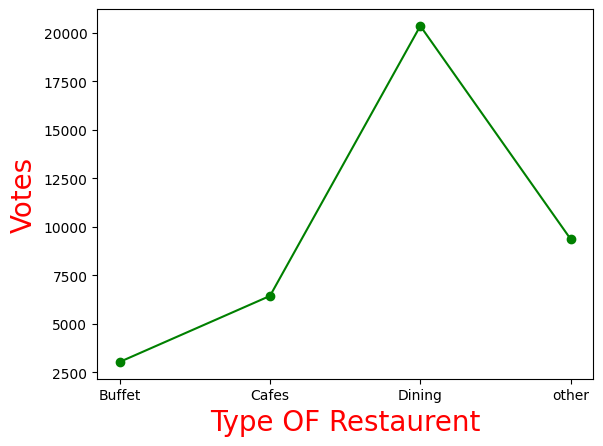

In [10]:
plt.plot(result, c='green', marker='o')
plt.xlabel("Type OF Restaurent",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)

Conclusion: Dinnig types of Restaurents have more Vote

# What are the rating that the majority of restaurents has received?

In [35]:
data['rate'].describe()

count    148.000000
mean       3.633108
std        0.402271
min        2.600000
25%        3.300000
50%        3.700000
75%        3.900000
max        4.600000
Name: rate, dtype: float64

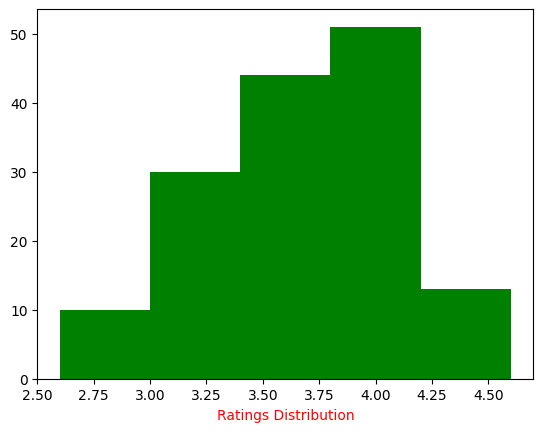

In [52]:
plt.hist(data['rate'], bins=5,color='Green')
plt.xlabel("Ratings Distribution",c="red")
plt.show()

Conclusion: The most given rating lies between 3.5 to 4.5.

# What is the average spending on each other. when most couples oredered food online

In [12]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
data['approx_cost(for two people)'].describe()

count    148.000000
mean     418.243243
std      223.085098
min      100.000000
25%      200.000000
50%      400.000000
75%      600.000000
max      950.000000
Name: approx_cost(for two people), dtype: float64

Text(0.5, 0, 'Money Spent')

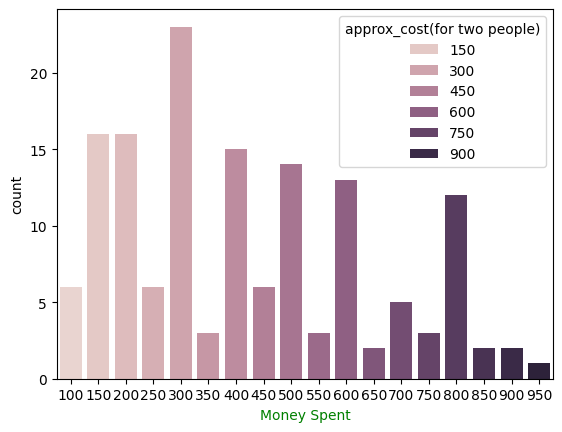

In [54]:
sns.countplot(x=data['approx_cost(for two people)'], hue="approx_cost(for two people)",data=data)
plt.xlabel("Money Spent", c="green")


Conclusion: for 2 people 300 rs are most spent.

Which mode receive the maximum rating.

<Axes: xlabel='online_order', ylabel='rate'>

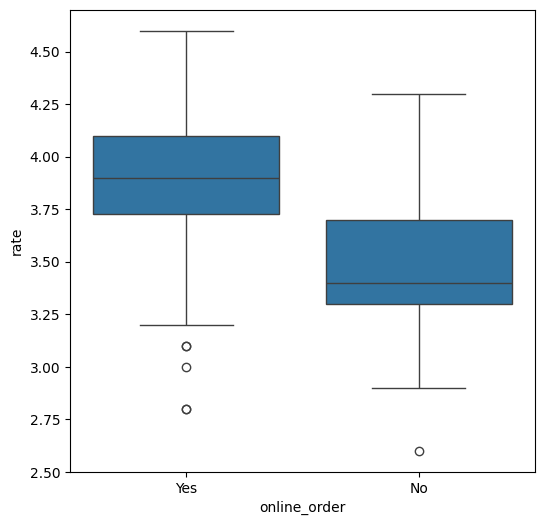

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=data)

Conclusion: Online Orders get more rating compares to Offline.

Which type of restaurent recieve more offline oreders, so that Zomaot can give some good offers

In [46]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


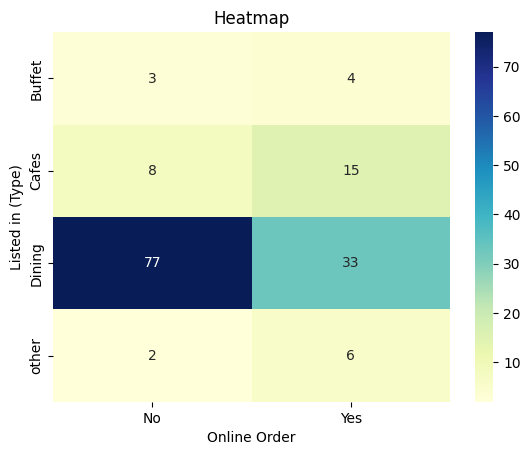

In [16]:
pivot = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

In [ ]:
Conclusion:Dinning Orders primarily accept offline orders, whereas cafes are primaily receives online orders. This suggests that Person loves Dinner
in Restaurents and and online ordering in cafes.